In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
import pandas as pd
import numpy as np

In [3]:
train_path = './train'

In [4]:
filenames = get_image_files(train_path)

In [5]:
labels = pd.read_csv('train.csv')
labels.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [6]:
labels.Id.value_counts().head()

new_whale    9664
w_23a388d      73
w_9b5109b      65
w_9c506f6      62
w_0369a5c      61
Name: Id, dtype: int64

In [7]:
print("Labels with only 1 image(%): " + str((labels.Id.value_counts() == 1).mean()))
print("'new_whale' images(%): " + str((labels.Id == "new_whale").mean()))

Labels with only 1 image(%): 0.4141858141858142
'new_whale' images(%): 0.3810575292772367


In [8]:
labels_dict = {row[1].Image: row[1].Id for row in labels.iterrows()}

In [9]:
data = ImageDataBunch.from_df(train_path, labels, ds_tfms=get_transforms(), size=224, bs=64
                                  ).normalize(imagenet_stats)

/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py:537: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
w_641df87, w_69edff7, w_3c972b3, w_dd677ef, w_2e1416e...
  if getattr(ds, 'warn', False): warn(ds.warn)


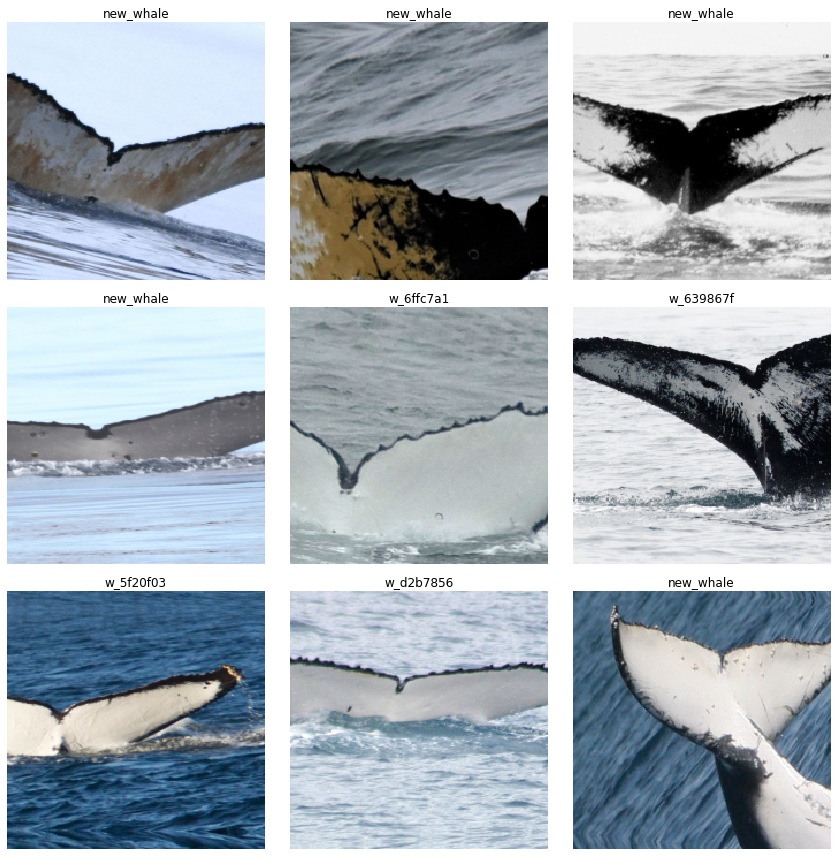

In [10]:
data.show_batch(rows=3)

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate])

In [12]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,6.353643,5.008814,0.572719,03:58
1,5.516173,4.788793,0.558837,03:23


In [13]:
learn.save('stage-1')

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

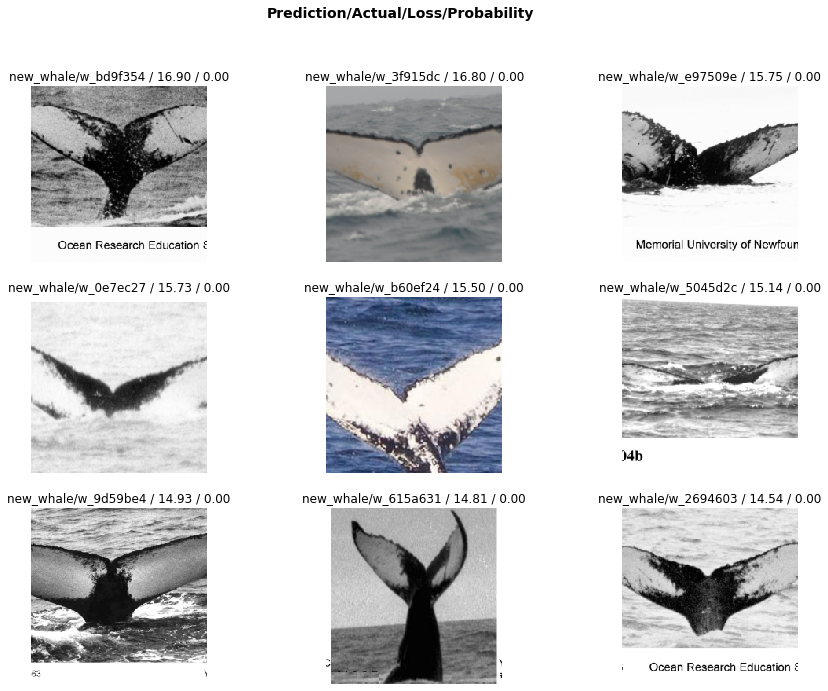

In [15]:
interp.plot_top_losses(9, figsize=(15,11))

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


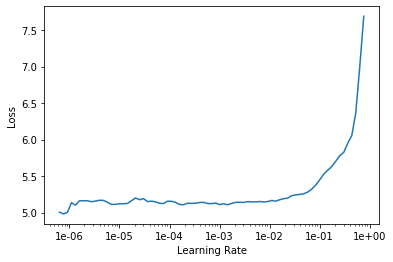

In [18]:
learn.recorder.plot()